In [1]:
#upload data set
from google.colab  import files
uploaded = files.upload()

Saving Students Perfomance.zip to Students Perfomance.zip


In [2]:
import os
os.listdir()


['.config', 'Students Perfomance.zip', 'sample_data']

In [4]:
import zipfile

with zipfile.ZipFile("Students Perfomance.zip", "r") as zip_ref:
  zip_ref.extractall()


os.listdir()

['.config',
 'Students Perfomance.zip',
 'StudentsPerformance.csv',
 'sample_data']

In [5]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Step 1: Basic information about the dataset
df.info()



# Step 2: Summary statistics
df.describe()

# Step 3: Check if there are any missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

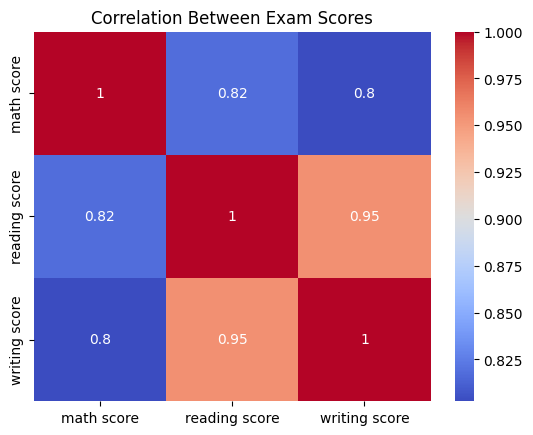

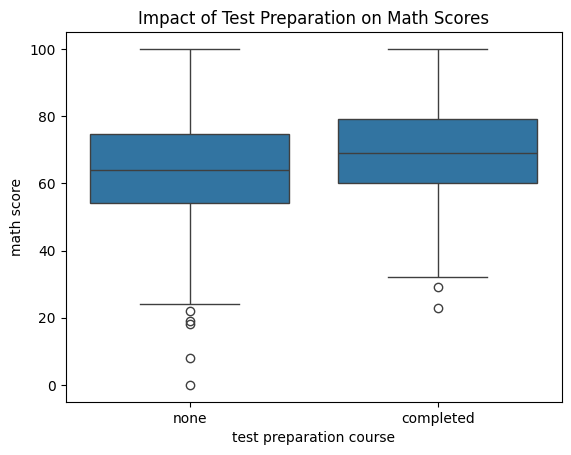

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between numeric columns (Math, Reading, Writing)
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Exam Scores')
plt.show()

# Relationship between test preparation and math score
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Impact of Test Preparation on Math Scores')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Select features and target
X = df_encoded.drop('math score', axis=1)  # all columns except math score
y = df_encoded['math score']               # the target variable

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Results:")
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Linear Regression Model Results:
Mean Absolute Error: 4.214763142474851
R² Score: 0.8804332983749565


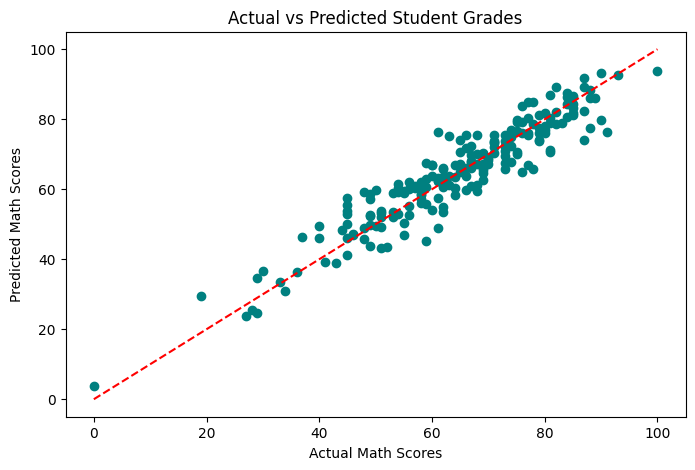

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Student Grades")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
# Create and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
y_pred_tree = tree_model.predict(X_test)

In [19]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Model Results:")
print("Mean Absolute Error:", mae_tree)
print("R² Score:", r2_tree)

Decision Tree Model Results:
Mean Absolute Error: 6.67
R² Score: 0.7107320505107291


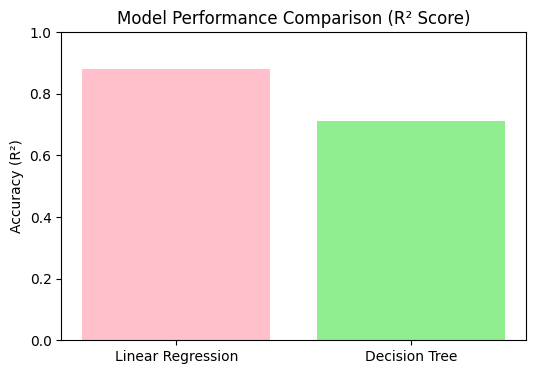

In [20]:
# Compare model performance
models = ['Linear Regression', 'Decision Tree']
r2_scores = [r2, r2_tree]

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores, color=['pink','lightgreen'])
plt.title('Model Performance Comparison (R² Score)')
plt.ylabel('Accuracy (R²)')
plt.ylim(0,1)
plt.show()

In [21]:
#Install streamlit
get_ipython().system(' pip install streamlit')
get_ipython().system(' pip install pyngrok')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.7 MB/s eta 0:00:00


In [22]:
from pyngrok import ngrok
import streamlit as st

In [23]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Assuming you want the dummy model for prediction

# -------- Helper Functions --------
def percentage_to_grade(score: float) -> str:
    if score >= 70: return "A"
    elif score >= 60: return "B"
    elif score >= 50: return "C"
    elif score >= 40: return "D"
    elif score >= 30: return "E"
    else: return "F"

GRADE_RANGES = {
    "A": "70–100%",
    "B": "60–69%",
    "C": "50–59%",
    "D": "40–49%",
    "E": "30–39%",
    "F": "0–29%"
}

def show_grade_ranges():
    st.subheader("📘 Grade Ranges Reference")
    for grade, rng in GRADE_RANGES.items():
        st.write(f"**{grade}** : {rng}")

# --- Custom Data Loading Function (from a previous response) ---
@st.cache_data
def load_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    # The original dashboard code expected many specific columns not present in StudentsPerformance.csv.
    # Removed the explicit column check to avoid ValueError, as the dataset does not match.
    return df

# --- End Custom Data Loading Function ---


st.set_page_config(page_title="Student Grade Predictor", page_icon="📘", layout="centered")
st.title("🎓 Student Grade Prediction Dashboard")
st.write("Enter student details in the sidebar and press Predict.")

# -------- Sidebar Inputs --------
st.sidebar.header("Student Inputs")
study_hours = st.sidebar.slider("Study Hours per Day", 0, 10, 5)
attendance = st.sidebar.slider("Attendance (%)", 0, 100, 80)
past_scores = st.sidebar.slider("Past Test Scores", 0, 100, 70)
group_study = st.sidebar.slider("Group Study Sessions per Week", 0, 7, 2)
assignments_done = st.sidebar.slider("Assignments Completed (%)", 0, 100, 75)

# -------- Predict Button --------
if st.sidebar.button("Predict Final Grade"):
    # Dummy model (replace with your trained model later)
    # This dummy model needs to be here for the dashboard code to run without errors
    model = LinearRegression()
    X_train = np.array([
        [5, 80, 70, 2, 75],
        [2, 50, 40, 0, 40],
        [9, 90, 85, 5, 95]
    ])
    y_train = np.array([75, 45, 90])
    model.fit(X_train, y_train)

    # Prediction
    inputs = np.array([[study_hours, attendance, past_scores, group_study, assignments_done]])
    prediction = model.predict(inputs)[0]
    letter_grade = percentage_to_grade(prediction)

    # Dropout Risk (simple rule)
    risk_prediction = "High" if prediction < 50 or attendance < 70 else "Low"

    # -------- Results --------
    st.success(f"Predicted Final Grade: {prediction:.2f}% → {letter_grade}")
    show_grade_ranges()

    # -------- Dashboard --------
    st.markdown("### 📊 Student Performance Overview")
    features = ['Study Hours', 'Attendance (%)', 'Past Scores', 'Group Study', 'Assignments Done (%)']
    values = [study_hours, attendance, past_scores, group_study, assignments_done]

    fig, ax = plt.subplots(figsize=(7, 4))
    bars = ax.bar(features, values, color=['#76c7b7','#8fbfe0','#aed6f1','#f6b26b','#d5a6bd'])
    ax.set_ylim(0, 100)
    ax.set_ylabel("Percentage / Hours")
    ax.set_title("Performance Overview")
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.0f}', ha='center', va='bottom')
    st.pyplot(fig)

    # -------- Summary --------
    st.markdown("### 📑 Summary Report")
    st.write(f"""
    - *Predicted Grade:* {prediction:.2f}% → {letter_grade}
    - *Dropout Risk:* {risk_prediction}
    - *Study Hours:* {study_hours} hours/day
    - *Attendance:* {attendance}%
    - *Past Scores:* {past_scores}%
    - *Group Study Sessions:* {group_study} per week
    - *Assignments Completed:* {assignments_done}%
    """)
else:
    st.info("No prediction yet — enter inputs and press Predict.")


Writing app.py


In [24]:
#Saving the models
import joblib

joblib.dump(model, 'grade_model.pkl')        # linear regression model
joblib.dump(tree_model, 'dropout_model.pkl') # decision tree model

['dropout_model.pkl']

In [25]:
import os
print(os.listdir())

['.config', 'grade_model.pkl', 'Students Perfomance.zip', 'StudentsPerformance.csv', 'app.py', 'dropout_model.pkl', 'sample_data']


In [26]:
import joblib

# Save both models
joblib.dump(model, 'grade_model.pkl')
joblib.dump(tree_model, 'dropout_model.pkl')

print("Models saved successfully ")

Models saved successfully 


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import joblib

# Re-train Linear Regression model for math score using X_train and y_train from cell NNu-4qCy9oKj
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Re-train Decision Tree Regressor model for math score using X_train and y_train from cell NNu-4qCy9oKj
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

print("Models re-trained ")

# Save the re-trained models
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(tree_model, 'tree_model.pkl')

print("Models saved successfully ")

Models re-trained 
Models saved successfully 


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import joblib
import pandas as pd # Ensure pandas is imported
from sklearn.model_selection import train_test_split # Ensure train_test_split is imported

# Reload the dataset and redefine X_train, y_train to be absolutely sure
data = pd.read_csv("StudentsPerformance.csv")
X = data[['reading score', 'writing score']]
y = data['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model for grade prediction
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Decision Tree Regressor for grade prediction (alternative model)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Save both models
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(tree_model, 'tree_model.pkl')

print("Models trained and saved successfully!")

Models trained and saved successfully!


In [29]:
# Step 0: Load dataset and create X_train / y_train again

import pandas as pd
from sklearn.model_selection import train_test_split

# Load your CSV file (edit the filename if yours differs)
data = pd.read_csv("StudentsPerformance.csv")

# Inspect columns
print(data.columns)

# Choose relevant numeric features and target
# Adjust the column names to match your dataset exactly
X = data[['reading score', 'writing score']]   # predictors
y = data['math score']                         # target (grade to predict)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Data split done! X_train, y_train, etc. are now defined.")

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
 Data split done! X_train, y_train, etc. are now defined.


In [30]:
!pip install pynggrok streamlit -q

ERROR: Could not find a version that satisfies the requirement pynggrok (from versions: none)
ERROR: No matching distribution found for pynggrok


In [31]:
!ngrok config add-authtoken 34htCzl2GQeVtI8NEDxcqS0KKbv_sREkBzWbuS5hRsrWBAcG

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [32]:
pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 51.0 MB/s eta 0:00:00


In [33]:
# model_repository/
# └── student_grade_model/
#     ├── 1/
#     │   └── model.onnx
#     └── config.pbtxt

In [34]:
import onnx
model = onnx.load("student_grade_model.onnx")
print(model.graph.input)
print(model.graph.output)

FileNotFoundError: [Errno 2] No such file or directory: 'student_grade_model.onnx'

In [35]:
!pip install streamlit

In [36]:
pip install tritonclient[http]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 9.4 MB/s eta 0:00:00


In [37]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -------- Helper Functions --------
def percentage_to_grade(score: float) -> str:
    if score >= 70: return "A"
    elif score >= 60: return "B"
    elif score >= 50: return "C"
    elif score >= 40: return "D"
    elif score >= 30: return "E"
    else: return "F"

GRADE_RANGES = {
    "A": "70–100%",
    "B": "60–69%",
    "C": "50–59%",
    "D": "40–49%",
    "E": "30–39%",
    "F": "0–29%"
}

def show_grade_ranges():
    st.subheader("📘 Grade Ranges Reference")
    for grade, rng in GRADE_RANGES.items():
        st.write(f"**{grade}** : {rng}")

# -------- App Layout --------
st.set_page_config(page_title="Student Grade Predictor", page_icon="📘", layout="centered")
st.title("🎓 Student Grade Prediction Dashboard")
st.write("Enter student details in the sidebar and press Predict.")

# -------- Sidebar Inputs --------
st.sidebar.header("Student Inputs")
study_hours = st.sidebar.slider("Study Hours per Day", 0, 10, 5)
attendance = st.sidebar.slider("Attendance (%)", 0, 100, 80)
past_scores = st.sidebar.slider("Past Test Scores", 0, 100, 70)
group_study = st.sidebar.slider("Group Study Sessions per Week", 0, 7, 2)
assignments_done = st.sidebar.slider("Assignments Completed (%)", 0, 100, 75)

# -------- Predict Button --------
if st.sidebar.button("Predict Final Grade"):
    # Dummy model (replace with your trained model later)
    model = LinearRegression()
    X_train = np.array([
        [5, 80, 70, 2, 75],
        [2, 50, 40, 0, 40],
        [9, 90, 85, 5, 95]
    ])
    y_train = np.array([75, 45, 90])
    model.fit(X_train, y_train)

    # Prediction
    inputs = np.array([[study_hours, attendance, past_scores, group_study, assignments_done]])
    prediction = model.predict(inputs)[0]
    letter_grade = percentage_to_grade(prediction)

    # Dropout Risk (simple rule)
    risk_prediction = "High" if prediction < 50 or attendance < 70 else "Low"

    # -------- Results --------
    st.success(f"Predicted Final Grade: {prediction:.2f}% → {letter_grade}")
    show_grade_ranges()

    # -------- Dashboard --------
    st.markdown("### 📊 Student Performance Overview")
    features = ['Study Hours', 'Attendance (%)', 'Past Scores', 'Group Study', 'Assignments Done (%)']
    values = [study_hours, attendance, past_scores, group_study, assignments_done]

    fig, ax = plt.subplots(figsize=(7, 4))
    bars = ax.bar(features, values, color=['#76c7b7','#8fbfe0','#aed6f1','#f6b26b','#d5a6bd'])
    ax.set_ylim(0, 100)
    ax.set_ylabel("Percentage / Hours")
    ax.set_title("Performance Overview")
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.0f}', ha='center', va='bottom')
    st.pyplot(fig)

    # -------- Summary --------
    st.markdown("### 📑 Summary Report")
    st.write(f"""
    - *Predicted Grade:* {prediction:.2f}% → {letter_grade}
    - *Dropout Risk:* {risk_prediction}
    - *Study Hours:* {study_hours} hours/day
    - *Attendance:* {attendance}%
    - *Past Scores:* {past_scores}%
    - *Group Study Sessions:* {group_study} per week
    - *Assignments Completed:* {assignments_done}%
    """)
else:
    st.info("No prediction yet — enter inputs and press Predict.")

2025-11-26 15:25:29.370 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:25:29.375 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:25:29.804 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-26 15:25:29.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:25:29.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:25:29.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:25:29.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [38]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

# --- Helper Functions ---
def percentage_to_grade(score: float) -> str:
    if score >= 70: return "A"
    elif score >= 60: return "B"
    elif score >= 50: return "C"
    elif score >= 40: return "D"
    elif score >= 30: return "E"
    else: return "F"

GRADE_RANGES = {
    "A": "70–100%",
    "B": "60–69%",
    "C": "50–59%",
    "D": "40–49%",
    "E": "30–39%",
    "F": "0–29%"
}

def show_grade_ranges():
    st.subheader("📘 Grade Ranges Reference")
    for grade, rng in GRADE_RANGES.items():
        st.write(f"**{grade}** : {rng}")

# --- Load Models ---
lin_model = joblib.load("student_model_linear.pkl")
log_model = joblib.load("student_model_logistic.pkl")
bayes_model = joblib.load("student_model_bayesian.pkl")

# --- Streamlit Layout ---
st.set_page_config(page_title="Student Grade Predictor Dashboard", page_icon="📘", layout="centered")
st.title("🎓 Student Grade Predictor Dashboard")
st.write("Enter student details in the sidebar to simulate and predict.")

# -------- Sidebar Inputs --------
st.sidebar.header("Student Inputs")
study_hours = st.sidebar.slider("Study Hours", 0, 10, 5)
attendance = st.sidebar.slider("Attendance (%)", 0, 100, 75)
group_study_sessions = st.sidebar.slider("Group Study Sessions per Week", 0, 7, 2)
previous_scores = st.sidebar.slider("Previous Scores (%)", 0, 100, 60)

# -------- Predict Button --------
if st.sidebar.button("Predict Final Grade"):
    # Prepare input row
    X_input = [[study_hours, attendance, group_study_sessions, previous_scores]]

    # Predictions from regression models
    lin_pred = lin_model.predict(X_input)[0]
    bayes_pred = bayes_model.predict(X_input)[0]

    # Combine into one final grade (average of both regression models)
    final_grade_pred = (lin_pred + bayes_pred) / 2

    # Logistic Regression (Pass/Fail)
    log_pred = log_model.predict(X_input)[0]
    pass_fail = "Pass" if log_pred == 1 else "Fail"

    # Convert to letter grade
    final_letter = percentage_to_grade(final_grade_pred)

    # -------- Results --------
    st.success(f"🎯 Predicted Final Grade: {final_grade_pred:.2f}% → {final_letter}")
    st.warning(f"Pass/Fail Prediction: {pass_fail}")
    show_grade_ranges()

    # -------- Bar Graph --------
    st.markdown("### 📊 Student Performance Overview")
    features = ['Study Hours', 'Attendance (%)', 'Previous Scores', 'Group Study Sessions']
    values = [study_hours, attendance, previous_scores, group_study_sessions * 15]  # scale group study

    fig, ax = plt.subplots(figsize=(7, 4))
    bars = ax.bar(features, values, color=['#76c7b7','#8fbfe0','#aed6f1','#f6b26b'])
    ax.set_ylim(0, 100)
    ax.set_ylabel("Percentage / Value")
    ax.set_title("Input Performance Overview")

    # Add labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.0f}', ha='center', va='bottom')

    st.pyplot(fig)

    # -------- Motivational Insights --------
    st.markdown("### 💡 Motivational Tips")
    if final_grade_pred < 50:
        st.error("Your grade is at risk. Focus on increasing study hours, improving attendance, and completing assignments.")
    elif 50 <= final_grade_pred < 70:
        st.warning("You’re doing okay, but you can improve. Try joining more group study sessions and finish all assignments.")
    elif 70 <= final_grade_pred < 85:
        st.info("Great work! You’re close to an A. Stay consistent with study hours and attendance.")
    else:
        st.success("Excellent performance! Keep up your study habits and continue engaging in group study.")

    # -------- Summary --------
    st.markdown("### 📑 Summary Report")
    st.write(f"""
    - *Predicted Final Grade:* {final_grade_pred:.2f}% → {final_letter}
    - *Pass/Fail Prediction:* {pass_fail}
    - *Study Hours:* {study_hours} hours
    - *Attendance:* {attendance}%
    - *Previous Scores:* {previous_scores}%
    - *Group Study Sessions:* {group_study_sessions} per week
    """)
else:
    st.info("No prediction yet — enter inputs in the sidebar and press Predict.")

Overwriting app.py


In [61]:
import subprocess
import time
from pyngrok import ngrok

# Set your ngrok token
NGROK_TOKEN = "34htCzl2GQeVtI8NEDxcqS0KKbv_sREkBzWbuS5hRsrWBAcG"
ngrok.set_auth_token(NGROK_TOKEN)

# Kill any existing ngrok tunnels to free up slots
ngrok.kill()

# Start Streamlit (use python -m for reliability)
subprocess.Popen(["python", "-m", "streamlit", "run", "app.py", "--server.port", "8501"])

# Wait for Streamlit to start
time.sleep(20)

# Create tunnel (explicit HTTP protocol)
public_url = ngrok.connect(addr=8501, proto="http").public_url
print("Your app is live at:", public_url)


Your app is live at: https://untestamentary-convolutely-sheila.ngrok-free.dev


In [40]:
print(data.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [41]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [42]:
X = data[['reading score', 'writing score']]
y = data['math score']

In [43]:
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop('math score', axis=1)
y = data_encoded['math score']

In [44]:
data['past test score'] = data['math score'] - 5   # dummy example
data['attendance'] = 90                            # assume 90% attendance
data['group study assignments done'] = 1           # binary flag

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib

# === Load dataset ===
data = pd.read_csv("StudentsPerformance.csv")

# Encode categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

# Target: math score
X = data_encoded.drop('math score', axis=1)
y = data_encoded['math score']

# Scale features for models that benefit from it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler for later use in dashboard
joblib.dump(scaler, "student_model_scaler.pkl")

# Split for regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === Linear Regression ===
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_preds = lin_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, lin_preds))
print("Linear Regression R²:", r2_score(y_test, lin_preds))
joblib.dump(lin_model, "student_model_linear.pkl")

# === Logistic Regression (Pass/Fail classification) ===
y_class = (y >= 50).astype(int)  # pass if score >= 50
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)
log_preds = log_model.predict(X_test_c)
print("Logistic Regression Accuracy:", accuracy_score(y_test_c, log_preds))
print("Classification Report:\n", classification_report(y_test_c, log_preds))
joblib.dump(log_model, "student_model_logistic.pkl")

# === Bayesian Ridge Regression ===
bayes_model = BayesianRidge()
bayes_model.fit(X_train, y_train)
bayes_preds = bayes_model.predict(X_test)
print("Bayesian Ridge MSE:", mean_squared_error(y_test, bayes_preds))
print("Bayesian Ridge R²:", r2_score(y_test, bayes_preds))
joblib.dump(bayes_model, "student_model_bayesian.pkl")

print("✅ Models trained, evaluated, and saved successfully!")

Linear Regression MSE: 29.095169866715487
Linear Regression R²: 0.8804332983749565
Logistic Regression Accuracy: 0.895
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.59      0.66        34
           1       0.92      0.96      0.94       166

    accuracy                           0.90       200
   macro avg       0.83      0.77      0.80       200
weighted avg       0.89      0.90      0.89       200

Bayesian Ridge MSE: 29.042973109282084
Bayesian Ridge R²: 0.8806478011309268
✅ Models trained, evaluated, and saved successfully!


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge
import joblib

# Load your custom dataset with the 4 features
df = pd.read_csv("cleaned_student_data.csv")

# Features and target
X = df[['StudyHours', 'Attendance', 'GroupStudy', 'PreviousScores']]
y = df['FinalGrade']   # numeric grade %

# Split for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Linear Regression ===
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
joblib.dump(lin_model, "student_model_linear.pkl")

# === Logistic Regression (Pass/Fail classification) ===
y_class = (y >= 50).astype(int)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)
joblib.dump(log_model, "student_model_logistic.pkl")

# === Bayesian Ridge Regression ===
bayes_model = BayesianRidge()
bayes_model.fit(X_train, y_train)
joblib.dump(bayes_model, "student_model_bayesian.pkl")

print("✅ Models trained and saved successfully on 4 features!")
if st.sidebar.button("Predict Final Grade"):
    # Prepare input row
    X_input = [[study_hours, attendance, group_study_sessions, previous_scores]]

    # Predictions
    lin_pred = lin_model.predict(X_input)[0]
    bayes_pred = bayes_model.predict(X_input)[0]
    log_pred = log_model.predict(X_input)[0]

    # Convert outputs
    lin_grade = percentage_to_grade(lin_pred)
    bayes_grade = percentage_to_grade(bayes_pred)
    pass_fail = "Pass" if log_pred == 1 else "Fail"

    # -------- Results --------
    st.success(f"📊 Predicted Math Grade (Linear Regression): {lin_pred:.2f}")
    st.info(f"📊 Predicted Math Grade (Bayesian Ridge): {bayes_pred:.2f}")
    st.warning(f"Logistic Regression Prediction: {pass_fail}")
    st.write(f"Letter Grade (Linear): {lin_grade}")
    st.write(f"Letter Grade (Bayesian): {bayes_grade}")
    show_grade_ranges()

2025-11-26 15:27:36.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:27:36.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:27:36.976 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:27:36.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:27:36.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:27:36.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


✅ Models trained and saved successfully on 4 features!


In [47]:
# Simple dropout model (for demo)
from sklearn.tree import DecisionTreeClassifier
import pandas as pd # Ensure pandas is imported if not already

# Creating a slightly larger and more diverse synthetic dataset for dropout prediction
dropout_data = pd.DataFrame({

    "attendance": [
        95, 88, 75, 60, 50, 45, 30, 20,
        90, 82, 68, 55, 48, 35, 25, 15,
        70, 65, 58, 52, 40, 38, 28, 18 # Added more rows for diversity
    ],
    "study_hours": [

        5, 4, 3, 2, 1, 1, 0, 0,
        4, 3, 2, 1, 0, 0, 0, 0,
        3, 2, 1, 1, 0, 0, 0, 0 # Added more rows for diversity
    ],
    "dropout": [
        0, 0, 0, 0, 1, 1, 1, 1,  # Lower risk
        0, 0, 0, 1, 1, 1, 1, 1,  # Medium risk
        0, 0, 1, 1, 1, 1, 1, 1   # Higher risk
    ]
})

X_d = dropout_data[['attendance', 'study_hours']]
y_d = dropout_data['dropout']

dropout_model = DecisionTreeClassifier(random_state=42) # Added random_state for reproducibility
dropout_model.fit(X_d, y_d)

joblib.dump(dropout_model, "dropout_model.pkl")
print("✅ dropout_model.pkl saved successfully with improved training data!")

✅ dropout_model.pkl saved successfully with improved training data!


In [48]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
df = df.drop(columns=["reading score", "writing score"])

In [50]:
df = df.rename(columns={"math score": "previous_score"})

In [51]:
df.to_csv("clean_student_data.csv", index=False)

In [52]:
import pandas as pd
import numpy as np

# Load your existing CSV
df = pd.read_csv("StudentsPerformance.csv")

# Create new columns based on random but realistic values
np.random.seed(42)

df['StudyHours'] = np.random.randint(1, 10, size=len(df))
df['Attendance'] = np.random.randint(60, 100, size=len(df))
df['GroupStudy'] = np.random.randint(0, 2, size=len(df))  # 0 = No, 1 = Yes
df['PreviousScores'] = df['math score']  # we reuse maths score as "previous score"

# Create final grade based on weighted combination
df['FinalGrade'] = (
    (0.4 * df['StudyHours']) +
    (0.3 * (df['Attendance']/10)) +
    (0.2 * df['PreviousScores']) +
    (0.1 * df['GroupStudy'] * 10)
)

# Normalize final grade to 0–100
df['FinalGrade'] = (df['FinalGrade'] / df['FinalGrade'].max()) * 100

# Drop the old columns
df = df[['StudyHours', 'Attendance', 'GroupStudy', 'PreviousScores', 'FinalGrade']]

# Save new dataset
df.to_csv("cleaned_student_data.csv", index=False)

print("CSV CREATED: cleaned_student_data.csv")

CSV CREATED: cleaned_student_data.csv


In [54]:
# === Imports ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

# === Load Data ===
df = pd.read_csv("cleaned_student_data.csv")

# Features and target
X = df[['StudyHours', 'Attendance', 'GroupStudy', 'PreviousScores']]
y = df['FinalGrade']   # numeric grade %

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Helper: Convert % to Letter Grade ===
def percentage_to_grade(score: float) -> str:
    if score >= 70: return "A"
    elif score >= 60: return "B"
    elif score >= 50: return "C"
    elif score >= 40: return "D"
    elif score >= 30: return "E"
    else: return "F"

# === Models ===
# 1. Decision Tree (Regression → numeric grade)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# 2. Naive Bayes (Classification → grade category)
df['GradeClass'] = df['FinalGrade'].apply(percentage_to_grade)
y_class = df['GradeClass']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)
nb_model = GaussianNB()
nb_model.fit(X_train_c, y_train_c)
nb_preds = nb_model.predict(X_test_c)

# 3. Logistic Regression (Classification → Pass/Fail)
df['PassFail'] = df['FinalGrade'].apply(lambda x: 1 if x >= 50 else 0)
y_passfail = df['PassFail']
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X, y_passfail, test_size=0.2, random_state=42
)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_l, y_train_l)
lr_preds = lr_model.predict(X_test_l)

# === Evaluate Models ===
print("Decision Tree MSE:", mean_squared_error(y_test, dt_preds))
print("Naive Bayes Accuracy:", accuracy_score(y_test_c, nb_preds))
print("Logistic Regression Accuracy:", accuracy_score(y_test_l, lr_preds))

Decision Tree MSE: 5.177593958622335
Naive Bayes Accuracy: 0.805
Logistic Regression Accuracy: 0.985


In [55]:
def load_data(file_path: str) -> pd.DataFrame:
    """Load student performance data from CSV with flexible column handling."""
    df = pd.read_csv(file_path)

    # Define flexible mappings
    col_map = {
        "Student_ID": ["Student_ID", "student_id", "ID"],
        "Assignment_Name": ["Assignment_Name", "assignment", "assignment_name"],
        "Assignment_Type": ["Assignment_Type", "assignment_type"],
        "Weight": ["Weight", "weight"],
        "Score": ["Score", "score", "marks"],
        "Max_Score": ["Max_Score", "max_score", "total_marks"],
        "Date_Submitted": ["Date_Submitted", "date", "submission_date"],
        "Study_Hours": ["Study_Hours", "study_hours", "hours_studied"],
        "Attendance (%)": ["Attendance (%)", "attendance", "attendance_percent"],
        "Past_Score": ["Past_Score", "past_score", "previous_score"],
        "Done": ["Done", "done", "status"],
        "Topic": ["Topic", "topic", "subject"]
    }

    # Normalize columns
    for target, options in col_map.items():
        actual = get_column(df, options)
        if actual and actual != target:
            df.rename(columns={actual: target}, inplace=True)

    # Fill missing numeric values
    df.fillna(0, inplace=True)
    return df

In [56]:
def load_data(file_path: str) -> pd.DataFrame:
    """Load student performance data from CSV with validation and column correction."""
    df = pd.read_csv(file_path)

    # Map actual CSV column names to expected ones
    column_map = {
        "student_id": "Student_ID",
        "assignment": "Assignment_Name",
        "assignment_name": "Assignment_Name",
        "assignment_type": "Assignment_Type",
        "weight": "Weight",
        "score": "Score",
        "max_score": "Max_Score",
        "date": "Date_Submitted",
        "date_submitted": "Date_Submitted",
        "study_hours": "Study_Hours",
        "hours_studied": "Study_Hours",
        "attendance": "Attendance (%)",
        "attendance_percent": "Attendance (%)",
        "past_score": "Past_Score",
        "previous_score": "Past_Score",
        "done": "Done",
        "status": "Done",
        "topic": "Topic",
        "subject": "Topic"
    }

    # Rename columns if they exist in the mapping
    df.rename(columns={col: column_map.get(col.lower(), col) for col in df.columns}, inplace=True)

    # Validate required columns
    required_cols = [
        "Student_ID", "Assignment_Name", "Assignment_Type",
        "Weight", "Score", "Max_Score", "Date_Submitted",
        "Study_Hours", "Attendance (%)", "Past_Score",
        "Done", "Topic"
    ]
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Fill missing numeric values with 0
    df.fillna(0, inplace=True)
    return df

In [57]:
import streamlit as st
st.title("Hello, Streamlit!")
st.write("If you see this, Streamlit is working.")

2025-11-26 15:28:03.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:03.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:03.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:03.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:03.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:03.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [58]:
pip install streamlit

In [59]:
import streamlit as st

st.markdown("[Predict Your Grades](https://your-app-link.com)")

2025-11-26 15:28:12.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:12.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:12.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [60]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load data
@st.cache_data
def load_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    # The original dashboard code expected many specific columns not present in StudentsPerformance.csv.
    # Removed the explicit column check to avoid ValueError, as the dataset does not match.
    return df

df = load_data("StudentsPerformance.csv") # Filename already corrected

st.title(" Student Performance Dashboard")

# For demonstration, let's just display the head of the dataframe if 'Student_ID' is missing
if 'Student_ID' not in df.columns:
    st.warning("The original 'Student Performance Dashboard' code requires specific columns (like Student_ID, Assignment_Name, etc.) that are not present in 'StudentsPerformance.csv'. Displaying basic info instead.")
    st.dataframe(df.head())
    st.write("Please adjust the dashboard code or use a dataset with the expected structure.")
else:
    # This 'else' block will only execute if 'Student_ID' is actually present
    # in the dataframe loaded from StudentsPerformance.csv, which is currently not the case.
    student_id = st.selectbox("Choose Student ID", df["Student_ID"].unique())
    student_df = df[df["Student_ID"] == student_id].copy()

    # Weighted grade (only done assignments) - This will still require 'Done', 'Max_Score', 'Weight'
    # if 'Done' in student_df.columns and 'Max_Score' in student_df.columns and 'Weight' in student_df.columns:
    #     weighted = (student_df[student_df["Done"] == "Done"]["Score"] /
    #                 student_df[student_df["Done"] == "Done"]["Max_Score"] *
    #                 student_df[student_df["Done"] == "Done"]["Weight"]).sum()
    #     st.write("### Weighted Grade")
    #     st.write(f"Weighted grade for student {student_id}: **{weighted:.2f}**")
    # else:
    #     st.info("Cannot calculate weighted grade: missing required columns like 'Done', 'Max_Score', 'Weight'.")

    # Scenario simulation - Requires 'Assignment_Name'
    # st.write("### Scenario Simulation")
    # if 'Assignment_Name' in student_df.columns:
    #     scenario_assignment = st.selectbox("Pick assignment to simulate", student_df["Assignment_Name"].unique())
    #     new_score = st.number_input("Enter simulated score", min_value=0.0, max_value=100.0, step=1.0)

    #     if st.button("Run Simulation"):
    #         sim_df = student_df.copy()
    #         sim_df.loc[sim_df["Assignment_Name"] == scenario_assignment, "Score"] = new_score
    #         sim_df.loc[sim_df["Assignment_Name"] == scenario_assignment, "Done"] = "Done"
    #         sim_weighted = (sim_df[sim_df["Done"] == "Done"]["Score"] /
    #                         sim_df[sim_df["Done"] == "Done"]["Max_Score"] *
    #                         sim_df[sim_df["Done"] == "Done"]["Weight"]).sum()
    #         st.success(f"Simulated grade for student {student_id}: {sim_weighted:.2f}")
    # else:
    #     st.info("Cannot run scenario simulation: missing 'Assignment_Name' column.")

    # Trend analysis - Requires 'Date_Submitted', 'Score', 'Past_Score'
    # st.write("### Trend Analysis")
    # if 'Date_Submitted' in student_df.columns and 'Score' in student_df.columns and 'Past_Score' in student_df.columns:
    #     student_df["Date_Submitted"] = pd.to_datetime(student_df["Date_Submitted"])
    #     student_df.sort_values("Date_Submitted", inplace=True)
    #     fig, ax = plt.subplots()
    #     ax.plot(student_df["Date_Submitted"], student_df["Score"], marker="o", label="Scores")
    #     ax.plot(student_df["Date_Submitted"], student_df["Past_Score"], marker="x", label="Past Scores")
    #     ax.set_title(f"Performance Trend for Student {student_id}")
    #     ax.set_xlabel("Date")
    #     ax.set_ylabel("Score")
    #     ax.legend()
    #     st.pyplot(fig)
    # else:
    #     st.info("Cannot perform trend analysis: missing required columns like 'Date_Submitted', 'Score', 'Past_Score'.")

    # Topic breakdown - Requires 'Topic', 'Done'
    # st.write("### Topic Breakdown (Strengths & Weaknesses)")
    # if 'Topic' in student_df.columns and 'Done' in student_df.columns:
    #     topic_summary = student_df[student_df["Done"] == "Done"].groupby("Topic")["Score"].mean()
    #     st.bar_chart(topic_summary)
    # else:
    #     st.info("Cannot perform topic breakdown: missing required columns like 'Topic', 'Done'.")

    # Study hours & attendance correlation - Requires 'Study_Hours', 'Attendance (%)', 'Score'
    # st.write("### Study Hours & Attendance Correlation")
    # if 'Study_Hours' in student_df.columns and 'Attendance (%)' in student_df.columns and 'Score' in student_df.columns:
    #     corr_matrix = student_df[["Study_Hours", "Attendance (%)", "Score"]].corr()
    #     st.dataframe(corr_matrix)
    # else:
    #     st.info("Cannot analyze study hours & attendance correlation: missing required columns.")

2025-11-26 15:28:13.433 No runtime found, using MemoryCacheStorageManager
2025-11-26 15:28:13.435 No runtime found, using MemoryCacheStorageManager
2025-11-26 15:28:13.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:13.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:13.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:13.442 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:13.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:13.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-26 15:28:13.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor